# we are going to predict the price of house


## importing the dataset 

In [48]:
#i am going to use boston dataset for the this project
import pandas as pd
import os
df=pd.read_csv('Boston.csv')


# about the dataset


In [ ]:
# The Boston Housing Dataset

# The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

In [49]:
#checking if there is missing data(null valuse,the data types present,or attributes present) 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB
None


In [50]:
df.head() ##displaying first 5 rows of dataset

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# plotting histogram of each attribute to get idea of dataset 

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>],
       [<AxesSubplot:title={'center':'chas'}>,
        <AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'dis'}>,
        <AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>],
       [<AxesSubplot:title={'center':'black'}>,
        <AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>]],
      dtype=object)

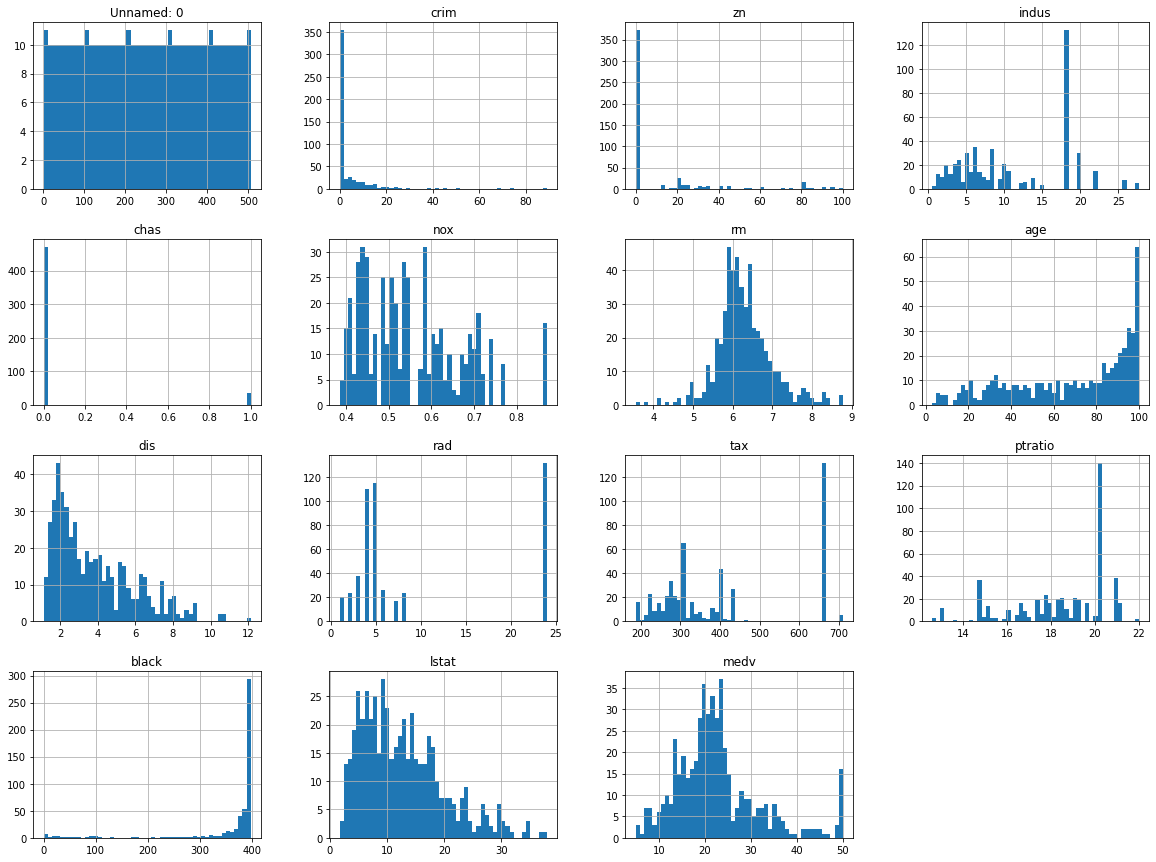

In [51]:
%matplotlib inline
df.hist(bins=50,figsize=(20,15))

# splitting of dataset into training and testing

In [8]:
#spliting data into traning and testing
#used 80:20 ratio(traing and testing respectively)
import numpy as np
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(df,test_size=0.2,random_state=42,shuffle=True)
print(f"Rows in train_set:{len(train_set)}\nRows in test_set:{len(test_set)}\n")


Rows in train_set:404
Rows in test_set:102



# getting correlation cofficent with respect to label

In [52]:
#getting the corelation of label data 
#for + corelation means our data is directly proportion to the attribute with +corelation cofficent
#for - corelaiton means our data is inversily proportion to the attribute with - corelation cofficent 
corr_matrix=df.corr()
corr_matrix['medv'].sort_values(ascending=False)

medv          1.000000
rm            0.695360
zn            0.360445
black         0.333461
dis           0.249929
chas          0.175260
Unnamed: 0   -0.226604
age          -0.376955
rad          -0.381626
crim         -0.388305
nox          -0.427321
tax          -0.468536
indus        -0.483725
ptratio      -0.507787
lstat        -0.737663
Name: medv, dtype: float64

array([[<AxesSubplot:xlabel='medv', ylabel='medv'>,
        <AxesSubplot:xlabel='rm', ylabel='medv'>,
        <AxesSubplot:xlabel='tax', ylabel='medv'>,
        <AxesSubplot:xlabel='lstat', ylabel='medv'>],
       [<AxesSubplot:xlabel='medv', ylabel='rm'>,
        <AxesSubplot:xlabel='rm', ylabel='rm'>,
        <AxesSubplot:xlabel='tax', ylabel='rm'>,
        <AxesSubplot:xlabel='lstat', ylabel='rm'>],
       [<AxesSubplot:xlabel='medv', ylabel='tax'>,
        <AxesSubplot:xlabel='rm', ylabel='tax'>,
        <AxesSubplot:xlabel='tax', ylabel='tax'>,
        <AxesSubplot:xlabel='lstat', ylabel='tax'>],
       [<AxesSubplot:xlabel='medv', ylabel='lstat'>,
        <AxesSubplot:xlabel='rm', ylabel='lstat'>,
        <AxesSubplot:xlabel='tax', ylabel='lstat'>,
        <AxesSubplot:xlabel='lstat', ylabel='lstat'>]], dtype=object)

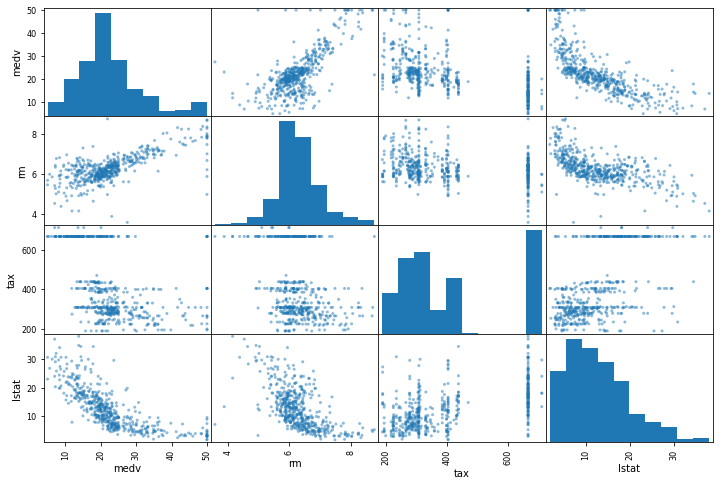

In [53]:
#from corelation cofficent we can see the attributes present in attributes list are vary important
#drawing there scatter matrix 

from pandas.plotting import scatter_matrix
attributes=['medv','rm','tax','lstat']
scatter_matrix(df[attributes],figsize=(12,8))


# splitting into features(i/p variable) and lables(o/p variable)

In [54]:
#splitting for both train and test to features and lables
#medv is lable(output/target value)

train_x=train_set.drop('medv',axis=1)
train_y=train_set['medv']
test_x=test_set.drop('medv',axis=1)
test_y=test_set['medv']


# creating pipeline

In [55]:

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')), 
    ('std_scaler',StandardScaler()),
])

# in pipeline we have used imputer to handel missing values (if found fill it with median) and standard scaler to scaling the values

In [56]:
#using pipeling tranforming the training data
train_x_transformed=my_pipeline.fit_transform(train_x)
train_x_transformed 

array([[ 1.59381791,  1.28770177, -0.50032012, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-1.65611846, -0.33638447, -0.50032012, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [ 0.57381624, -0.40325332,  1.01327135, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [ 0.68636815, -0.40547014,  2.95931752, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 1.29836915,  0.85189733, -0.50032012, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-1.04411745, -0.38135592, -0.50032012, ...,  1.15981657,
        -3.12158061, -0.25731635]])

# evaluating the model 

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

#creating dectionary for iterating over diffrent models we will use 

models = {'LogReg':LinearRegression(), 
          'DecTree':DecisionTreeRegressor(),
          'RandomForest':RandomForestRegressor()
}

#using the dictionar for models and printing the rmse score,mean,std

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(train_x_transformed,train_y)
    scores=cross_val_score(model,df2,train_y,scoring='neg_mean_squared_error',cv=10)
    rmse_scores=np.sqrt(-scores)
    print("using model ",model)
    print('scores are = ',rmse_scores)
    print('mean is = ',rmse_scores.mean())
    print('standard deviation is = ',rmse_scores.std())
    print()

using model  LinearRegression()
scores are =  [3.84683404 4.24602006 5.31230677 6.77919744 4.57062826 5.29509207
 4.39562152 4.51912322 3.63750039 5.71602505]
mean is =  4.831834880666123
standard deviation is =  0.9008670141114725

using model  DecisionTreeRegressor()
scores are =  [3.70582929 4.26908912 4.28847008 7.17939124 5.92800557 3.8607318
 4.69153493 5.4110997  2.93240516 5.68902452]
mean is =  4.795558140345559
standard deviation is =  1.1924826227212966

using model  RandomForestRegressor()
scores are =  [3.21454854 3.16455892 2.86995083 5.25840309 4.49256957 2.82056703
 3.81601656 2.51803568 2.60170853 4.55489547]
mean is =  3.531125421671608
standard deviation is =  0.9002185641574925



# from above we have found that random forest regressor is providing  better accuracy so we will use that

# testing the model

In [46]:
#testing of the model 
from sklearn.metrics import mean_squared_error
#using pipeling we are tranforming the testing data 

test_x_transformed=my_pipeline.transform(test_x)

#using predict funtion to get the pridicted value 

y_predicted=model.predict(test_x_transformed)

#finding mean square error 

mean_square_error=mean_squared_error(test_y, y_predicted)

#printing final rmse score we have got 

rmse=np.sqrt(mean_square_error)
print(rmse)

3.162787675825386
